# Scikit learn workflow
1. Getting the data ready
2. choose the right model/estimator 
3. Fit the data
4. Evaluate the model 
5. improve a model by tunning hyperparamteres
6. Save and load a train model

In [66]:
# Importing libraries 
import pandas as pd
#import scikit as sk
import numpy as np

In [93]:
#Read csv file 
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
# Getting data ready by sepearting labels and features
#Seperating target column because it's y 
X = heart_disease.drop("target", axis=1)

In [69]:
# Feature set not including y column(ouput)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [70]:
#getting y labels
Y = heart_disease["target"]

In [71]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
#Fitting model clf stands for classifier random forest 
clf = RandomForestClassifier()

In [82]:
#importing train test split to prepare data
from sklearn.model_selection import train_test_split

In [83]:
# Getting data ready
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
# fit model
clf.fit(X_train,Y_train);

In [85]:
#predicting using X test
y_prd = clf.predict(X_test)

In [86]:
y_prd

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [87]:
# checking model accuracy on training data 
clf.score(X_train,Y_train) * 100

100.0

In [88]:
# Checking model accuracy on test data
clf.score(X_test, Y_test) * 100

80.32786885245902

In [89]:
# importin score metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [90]:
classification_report(Y_test, y_prd)

'              precision    recall  f1-score   support\n\n           0       0.76      0.70      0.73        23\n           1       0.82      0.87      0.85        38\n\n    accuracy                           0.80        61\n   macro avg       0.79      0.78      0.79        61\nweighted avg       0.80      0.80      0.80        61\n'

In [52]:
confusion_matrix(Y_test, y_prd)

array([[23,  8],
       [ 2, 28]], dtype=int64)

In [55]:
accuracy_score(Y_test, y_prd) * 100

83.60655737704919

In [58]:
# Impoving model by using different hyperparameter
for i in range(10,100, 10):
    print(f"Trying value of estimator {i}")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"prediction score for {i} is {clf.score(X_test,Y_test) * 100}")

Trying value of estimator 10
prediction score for 10 is 86.88524590163934
Trying value of estimator 20
prediction score for 20 is 83.60655737704919
Trying value of estimator 30
prediction score for 30 is 81.9672131147541
Trying value of estimator 40
prediction score for 40 is 85.24590163934425
Trying value of estimator 50
prediction score for 50 is 80.32786885245902
Trying value of estimator 60
prediction score for 60 is 80.32786885245902
Trying value of estimator 70
prediction score for 70 is 83.60655737704919
Trying value of estimator 80
prediction score for 80 is 85.24590163934425
Trying value of estimator 90
prediction score for 90 is 78.68852459016394


In [62]:
# Save and load a model 
import pickle
pickle.dump(clf, open("random_forest_classifier_trained_on_heart_disease", "wb"))

In [64]:
# importing saved model
import pickle

model = pickle.load(open("random_forest_classifier_trained_on_heart_disease", "rb"))

In [65]:
model.score(X_test, Y_test)

0.7868852459016393

# Converting string values to numberic so to train our model on such data

In [91]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn

In [124]:
#Importing dataset
car_sales = pd.read_csv("data/car_slaes_missing_dropped.csv")

In [125]:
len(car_sales)

815

In [137]:
car_sales.head(10)
#Dropping extra column
#car_sales = car_sales.drop("Unnamed: 0", axis=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
810,BMW,Blue,163322.0,3.0,31666.0
811,Toyota,Black,35820.0,4.0,32042.0
812,Nissan,Blue,66604.0,4.0,31570.0
813,Honda,White,215883.0,4.0,4001.0


In [138]:
car_sales.dtypes


Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [139]:
# creating y variable and assigning label data

X = car_sales.drop("Price", axis=1)

Y = car_sales["Price"]

In [140]:
Y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
810    31666.0
811    32042.0
812    31570.0
813     4001.0
814    12732.0
Name: Price, Length: 815, dtype: float64

In [150]:
X.head(15
      )

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.000000,4.0
1,BMW,Blue,192714.000000,5.0
2,Honda,White,84714.000000,4.0
3,Toyota,White,154365.000000,4.0
4,Nissan,Blue,181577.000000,3.0
5,Honda,Red,42652.000000,4.0
6,Toyota,Blue,163453.000000,4.0
7,Honda,White,131253.237895,4.0
8,Honda,Blue,51029.000000,4.0
9,Nissan,White,167421.000000,4.0


In [142]:
#Importing model named random forest regressor as it's a regression problem
from sklearn.ensemble import RandomForestRegressor

# Instantiante random forest regressor 
clf = RandomForestRegressor()

In [143]:
# importin test train split to split our data into two sets
from sklearn.model_selection import train_test_split

In [144]:
# splitting our data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [118]:
# training our model on this data 
clf.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Honda'

In [146]:
# our model cannot be trained on this data because some of it's columns are in string format 
# so now we will change them to numberical format so that we can train our model 

# importing function for that purpose 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]

# instantiating one hot encode
one_hot = OneHotEncoder()


In [148]:
# we will now pass our one hot encoder and data to encode to out column transformer

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
# now fitting to our X variable
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [149]:
# converting tranformed_X in to data frame
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,163322.0
811,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
812,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [151]:
# let's get a more breif view 
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
810,3.0,1,0,0,0,0,1,0,0,0
811,4.0,0,0,0,1,1,0,0,0,0
812,4.0,0,0,1,0,0,1,0,0,0
813,4.0,0,1,0,0,0,0,0,0,1


In [170]:
#Let refit/retrain our model 
np.random.seed(42)
len(Y),len(transformed_X)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
#len(X_train) , len(Y_train)
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [171]:
clf.score(X_test, Y_test)

0.30483684162728897

# Let's now fill our missing values in this part by first method.
* Using Pandas

In [198]:
# importing pandas 
import pandas as pd

# importing our data set with missing values

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [199]:
# checking number of rows in our dataset
len(car_sales_missing)

1000

In [200]:
# checking how much missing values are in each column 
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [201]:
# removing all rows having price values missing because those rows having missing labels are useless
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [203]:
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [183]:
# Seperating X and Y 
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [184]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [197]:
Y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

## Fill missing values with pandas method 1

In [204]:
# filling make column 
car_sales_missing["Make"].fillna("missing", inplace=True)

#filling colour column 
car_sales_missing["Colour"].fillna("missing", inplace=True)

#filling door column
car_sales_missing["Doors"].fillna(4, inplace=True)

#filling Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),
                                                                              inplace=True)

In [205]:
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.000000,4.0,15323.0
1,BMW,Blue,192714.000000,5.0,19943.0
2,Honda,White,84714.000000,4.0,28343.0
3,Toyota,White,154365.000000,4.0,13434.0
4,Nissan,Blue,181577.000000,3.0,14043.0
5,Honda,Red,42652.000000,4.0,23883.0
6,Toyota,Blue,163453.000000,4.0,8473.0
7,Honda,White,130987.447894,4.0,20306.0
8,missing,White,130538.000000,4.0,9374.0
9,Honda,Blue,51029.000000,4.0,26683.0


In [206]:
# Now let's check if we have any missing values remaining 
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [208]:
#Splitting data into X and Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales["Price"]

In [210]:
#Convert catagorical values to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_values = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               catagorical_values)],
                               remainder="passthrough")
transformer_X = transformer.fit_transform(car_sales_missing)

In [211]:
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [217]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


# Now we will fill missing values using Skleran


In [214]:
#import skearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [224]:
# we will fill catagorical with missing and numerical with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define colums
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create  an imputer to fill values
X_transformed = ColumnTransformer([("cat_imputer",cat_imputer,cat_feature),
                                  ("door_imputer",door_imputer,door_feature),
                                  ("num_impurter",num_imputer,num_features)],
                             )
filled_X = X_transformed.fit_transform(X)

In [225]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [227]:
# make a data frame using fille_X
car_sales_X_filled =  pd.DataFrame(filled_X, columns=["Make","Colour","Odometer (Km)","Doors"])

In [228]:
car_sales_X_filled

,Make,Colour,Odometer (Km),Doors
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [229]:
car_sales_X_filled.isna().sum()

Make             0
Colour           0
Odometer (Km)    0
Doors            0
dtype: int64

# let's implement a linear model on a boston dataset in scikit-learn

In [1]:
# importing dataset from scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston;

In [5]:
import pandas as pd
#let's convert this dataset into pandas dataset
boston_data = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_data["target"]= boston["target"]


In [8]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [245]:
#After consulting to scikit learn model map we will use ridge model
from sklearn.linear_model import Ridge

In [247]:
# now we will prepare our data and split into X and Y
X = boston_data.drop("target", axis=1)
Y = boston_data["target"]

In [248]:
# import train test split function 
from  sklearn.model_selection import train_test_split
# we will split data to test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [251]:
# now will fit the model 
model = Ridge()
model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [253]:
model.score(X_test, Y_test) * 100

76.55593152168747

In [259]:
# Now will use same dataset and fit it to random forest
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test) * 100

92.49390820917864

### so our accuracy had been improved by using random forest

# we will now look at two function predict()  and predict_proba() 

In [263]:
clf.predict(X_test[:5])

array([14.807, 21.434, 20.823, 14.517, 31.3  ])

In [264]:
clf.predict_proba(X_test[:5])

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [276]:
# let's train our regression model for our boston_data 
from sklearn.ensemble import RandomForestRegressor

#let's seed so that our values remain same
np.random.seed(42)

# let's prepare our data
X = boston_data.drop(["target"], axis=1)
Y = boston_data["target"]
# let's split our data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# let's fit the model

model = RandomForestRegressor().fit(X_train, Y_train)
# Predicted by model
Y_pred = model.predict(X_test)

In [277]:
#actual output
Y_actual = np.array(Y_test)

In [278]:
# Let's use a mertic calle mean square
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_actual, Y_pred)

2.1226372549019623

# Now we will use cross-validation to evaluate our predictions


In [297]:
#importing cross validations
from sklearn.model_selection import cross_val_score

heart_disease = pd.read_csv("data/heart-disease.csv")

# prepare data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#importing model and train test split
from sklearn.model_selection import train_test_split
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2)


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test, Y_test)

# let's use cross validatoi





#now we will call cross_val_score on this data

cross_val_score(clf,X,Y,cv=5)


array([0.83606557, 0.8852459 , 0.81967213, 0.81666667, 0.8       ])

In [295]:
# let's take mean of cross_val_score using numpy
np.mean(cross_val_score(clf,X,Y,cv=5))

0.8116939890710382

## now we will evaluate our model using Area under the curve or ROC/AUC metric so let's go

* it's basically comparison between true positive or false positive 

In [310]:
# let's import this roc_cruve
from sklearn.metrics import roc_curve

#make predictions with probabilities 
y_prob = clf.predict_proba(X_test)

# let's only use predictions for class = 1
# so we will use numpy indexing to seperate this 

y_prob_pos = y_prob[:,1]


In [311]:
y_prob_pos[:10]

array([0.66, 0.83, 0.01, 0.95, 0.28, 0.58, 0.21, 0.5 , 0.65, 0.15])

In [313]:
# caculate fpr(false positive rate), tpr(true postive rate) and thresholds

fpr, tpr, thresholds = roc_curve(Y_test, y_prob_pos)

In [317]:
# now let's calculate score using roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_prob_pos)


0.8790322580645162

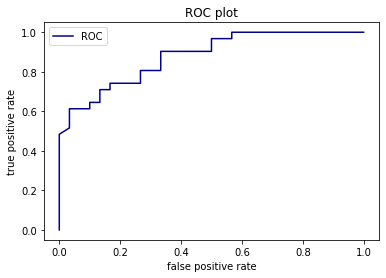

In [327]:
# plotting a plot for roc curve so we will will define a function for that
import matplotlib.pyplot as plt

# now we will define a function to plot that cruve
def plot_roc_curve(fpr, tpr):
    #plot roc curve 
    plt.plot(fpr,tpr,color="darkblue", label="ROC")
    #customizing the plot
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC plot")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

#  we will use confusion matrix to evaluate our model 


In [332]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

y_predics = clf.predict(X_test)
confusion_matrix(y_predics, Y_test)

array([[24,  8],
       [ 6, 23]], dtype=int64)

In [335]:
# now we call use pandas cross tab function to visualise it
pd.crosstab(Y_test,
            y_predics ,
            colnames=["Predicted labels"],
                                                   rownames=["Actual  labels"])

Predicted labels,0,1
Actual labels,,
0,24,6
1,8,23


In [338]:
# let's install seaborn using jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix}  seaborn


EnvironmentLocationNotFound: Not a conda environment: H:\Latest



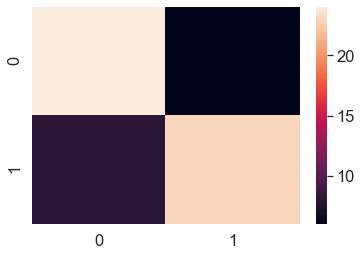

In [340]:
# let's visulase it through sea born
import seaborn as sns

#set font 
sns.set(font_scale=1.5)

# create confusion matrix 
conf_mat= confusion_matrix(Y_test, y_predics)

# create heat map using sea born

sns.heatmap(conf_mat)

In [346]:
# Let's implement our last metric for classification models classification report 
from sklearn.metrics  import classification_report 
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Now we will see  metrics applied to a regression model
## * Mean Absolute Error (MAE)

In [351]:
#importing model
from sklearn.ensemble import RandomForestRegressor
#importing MAE 
from sklearn.metrics import mean_absolute_error

#import dataset
car_sales  = pd.read_csv("data/car-sales.csv")
 
from sklearn.model_selection import train_test_split

X  = car_sales.drop("Price", axis = 1)
Y = car_sales["Price"]

X_train, Xtest, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [352]:
# implementing MAE
model = RandomForestRegressor()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Toyota'

# finally using the scoring parameter in cross validation score

In [19]:
# importing cross val score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Getting data ready 

heart_disease = pd.read_csv("data/heart-disease.csv")

# Preparing data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2)

# seed so our result can be reproducible 
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
#clf.score(X_test, Y_test)


# let's use cross val

cv = cross_val_score(clf, X, y, scoring="accuracy" )
cv

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [20]:
np.mean(cv)

0.8214754098360656

In [23]:
# now let's use a differenct metric let's say  we use recall 
cv_recall = cross_val_score(clf, X, y , scoring="recall")
cv_recall
np.mean(cv_recall)

0.8545454545454545

In [25]:
# now we will use percision 
cv_prec = cross_val_score(clf, X, y , scoring="precision")
cv_prec

array([0.78947368, 0.90625   , 0.83870968, 0.78787879, 0.77777778])

In [26]:
np.mean(cv_prec)

0.8200179854572893

In [29]:
# now let's try our last f1 metric
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.850198536051878

# NOw let's do this for regression models 

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# now let's prepare data
X = boston_data.drop("target", axis=1)
y = boston_data["target"]


# now let's split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# now let's fit our model 
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


# now let's try corss validation 
cv = cross_val_score(model, X, y)
np.mean(cv)

0.6157785876205734

In [40]:
# now let's try a differenct metric 
cv_r2 = cross_val_score(model, X, y, scoring="r2")
np.mean(cv_r2)

0.6127120708980884

In [42]:
# let's try mean absolute error(MAE)
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.0464972432537367

In [44]:
# let's try mean square error(MSE)
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mae)

-21.815890644767993

# Now we will tune our hyperparameters by thre ways
* by hand
* by randomized search 
* Grid method



`By Hand`

In [47]:
# first we will do it by hand so let's do it
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [49]:
# let's check what are the hyperparameter it has

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
#importing different metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Now we will make a function to evaluate our Classification model on different metrics like precision, recall etc
def evaluate_prd(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = { "accuracy" : round(accuracy,2),
                   "precision" : round(precision,2),
                   "recall" : round(recall,2),
                   "f1" : round(f1,2)
                  }
    print(f"Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision }")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    
    return metric_dict

    
    

In [87]:
# let's prepare our data

np.random.seed(42)
#let's shuffle our data or randomize it

heart_disease_shuffled = heart_disease.sample(frac=1)

# let's seperate x and y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#let make three sets training, validation and test set

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
train_split
X_train , Y_train = X[:train_split], y[:train_split]

X_valid , Y_valid = X[train_split: valid_split], y[train_split:valid_split]
X_test , Y_test = X[valid_split:], y[valid_split:]

clf.fit(X_train, Y_train)
# make basline preciction 
y_preds = clf.predict(X_valid)
len(y_preds), len(Y_valid)
evaluate_prd(Y_valid, y_preds)

Accuracy: 82.22 %
Precision: 0.8148148148148148
Recall: 0.88
F1: 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [92]:
# model 2 
#let's change our model parameters
clf2 = RandomForestClassifier(n_estimators= 100)
clf2.fit(X_train, Y_train)
# make basline preciction 
y_preds = clf2.predict(X_valid)
len(y_preds), len(Y_valid)
evaluate_prd(Y_valid, y_preds)

Accuracy: 84.44 %
Precision: 0.8461538461538461
Recall: 0.88
F1: 0.8627450980392156


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

# Hyperparameter tunning usin randomized search CV


In [98]:
#let's import  randomized  serach cv
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters that we want to train
grid = { "n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
         "min_samples_split": [2, 4, 6],
         "min_samples_leaf":[1,2,4]
    

       }

# Instantiate  random forest classifier

clf = RandomForestClassifier(n_jobs=-1)

# strup randomized serarch cv

rs_clf = RandomizedSearchCV(estimator=clf,
                       param_distributions=grid,
                       n_iter=10, # no of models to try 
                       cv=5,
                       verbose=2)
#fit the model 
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   5.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.6s
[CV] n_estimators=1200, min_samples_spl

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [99]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [100]:
rd_clf_pred =rs_clf.predict(X_test)

evaluate_prd(Y_test, rd_clf_pred)


Accuracy: 82.61 %
Precision: 0.8695652173913043
Recall: 0.8
F1: 0.8333333333333333


{'accuracy': 0.83, 'precision': 0.87, 'recall': 0.8, 'f1': 0.83}

# Now we will save our trained model 
## There are two ways to do it

1. using pickle
2. joblib

In [102]:
# using pickle to save a trainede model
import pickle as pkl

# export/ save a model
pkl.dump(rs_clf, open("random_forest_trained_model_1.pkl","wb"))

In [104]:
# now importin our saved model again 
loaded_model = pkl.load(open("random_forest_trained_model_1.pkl", "rb"))

In [110]:
# now we will use same model to predict

y_pred = loaded_model.predict(X_test)
evaluate_prd(Y_test, y_pred)

Accuracy: 82.61 %
Precision: 0.8695652173913043
Recall: 0.8
F1: 0.8333333333333333


{'accuracy': 0.83, 'precision': 0.87, 'recall': 0.8, 'f1': 0.83}

`using joblib`

In [112]:
#importing joblib
from joblib import dump,load

In [114]:
dump(rs_clf,filename="random_forest_trained_model1.joblib")

['random_forest_trained_model1.joblib']

In [116]:
#importing model again
loaded_mode = load(filename="random_forest_trained_model1.joblib")

In [118]:
# making predictions using this model
y_pred = loaded_mode.predict(X_test)
evaluate_prd(Y_test, y_pred)

Accuracy: 82.61 %
Precision: 0.8695652173913043
Recall: 0.8
F1: 0.8333333333333333


{'accuracy': 0.83, 'precision': 0.87, 'recall': 0.8, 'f1': 0.83}

# Let's put it together all we have learn till now

In [142]:
# libraries for getting data read
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# libraries for modeling
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# let's seeed to make our results reproducible

np.random.seed(42)

# let's import and clean our data

data = pd.read_csv("data/car-sales-extended-missing-data.csv")

#let's remove rows with missing labels

data.dropna(subset=["Price"],inplace=True)

#define different features and transformer pipelines
catagorical_features = ["Make" , "Colour"]
catagorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value= "missing") ),
    ( "onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value= 4))])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                transformers=[
                    ("cat", catagorical_transformer, catagorical_features),
                    ("door", door_transformer, door_features),
                    ("num", numerical_transformer, numerical_features)
                ])

# creating a preprocessing and modeling pipleline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor()) ])

# split data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
#len(X_train), len(X_test), len(Y_train), len(Y_test)

#fit and score

model.fit(X_train,Y_train);
model.score(X_test, Y_test)







0.22188417408787875

In [152]:
# using grid serach cv to improve our regression model
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split":[2,4]
    
    }
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [154]:
gs_model.score(X_test, Y_test)

0.3339554263158365

# so here our scikit learn section ends